In [16]:
#install.packages(c("ISLR", "MASS"), repos='http://cran.us.r-project.org')
library("ISLR")
library("MASS")

# Linear Regression

## Simple Linear Fit

In [2]:
lm.fit=lm(medv~lstat,data=Boston)

In [3]:
lm.fit
names(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [4]:
summary(lm.fit)
names(summary(lm.fit))
coef(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

(Intercept)       lstat 
 34.5538409  -0.9500494

In [5]:
confint(lm.fit)
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="confidence")
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="prediction")

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


In [6]:
confint(lm.fit)
predict(lm.fit, data.frame(lstat=(c(5,10,15))), interval="confidence")
predict(lm.fit, data.frame(lstat=(c(5,10,15))), interval="prediction")

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


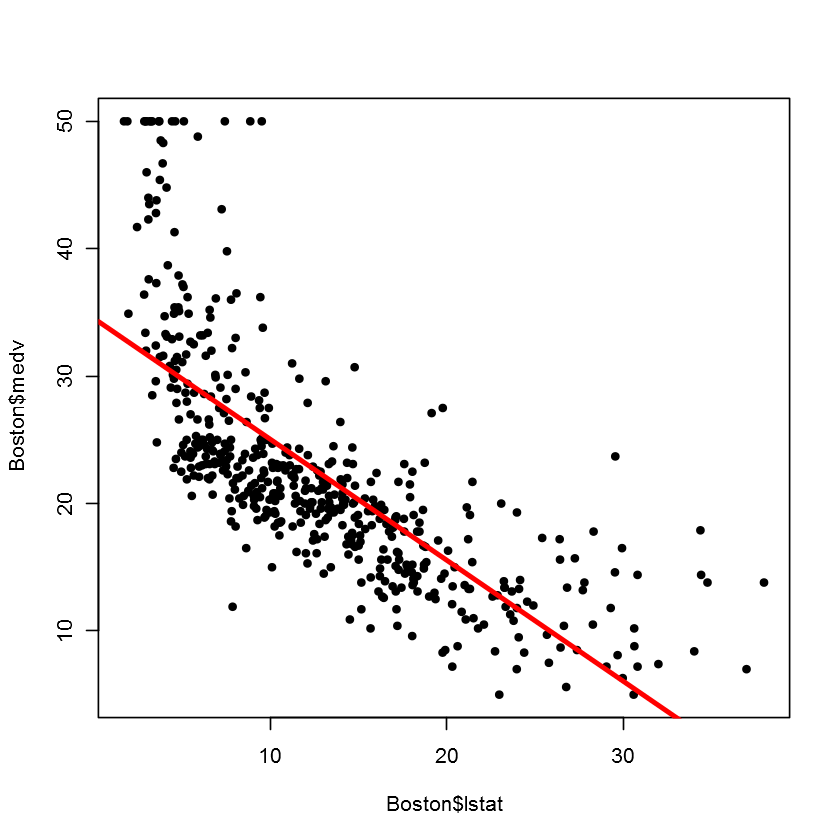

In [7]:
plot(Boston$lstat,Boston$medv,pch=20)
abline(lm.fit,lwd=3,col="red")

## Diagnostics plot

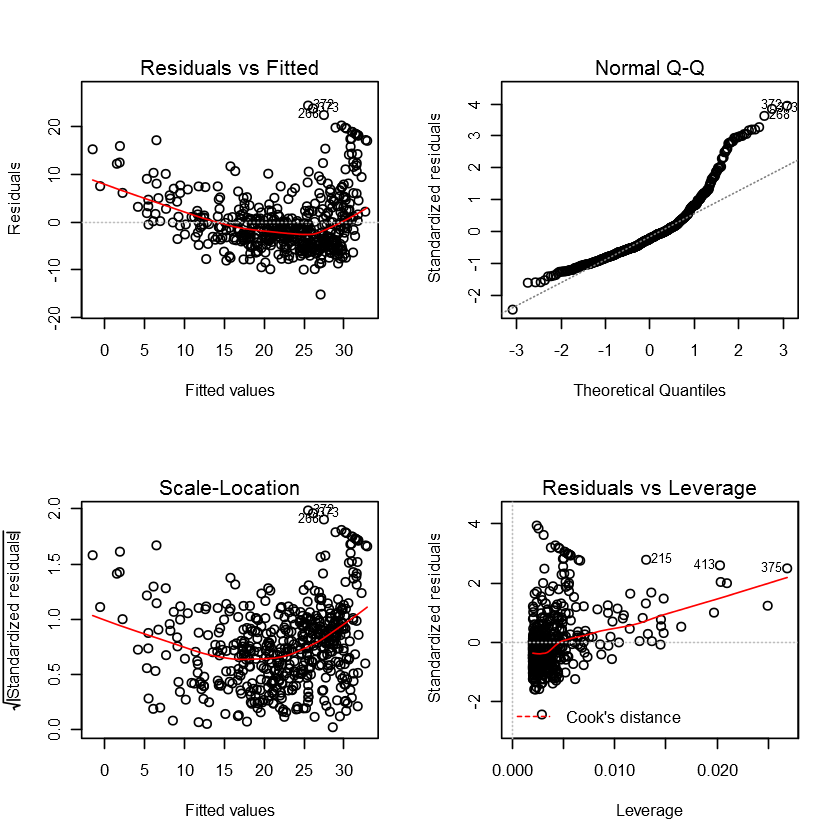

In [8]:
par(mfrow=c(2,2))
plot(lm.fit)

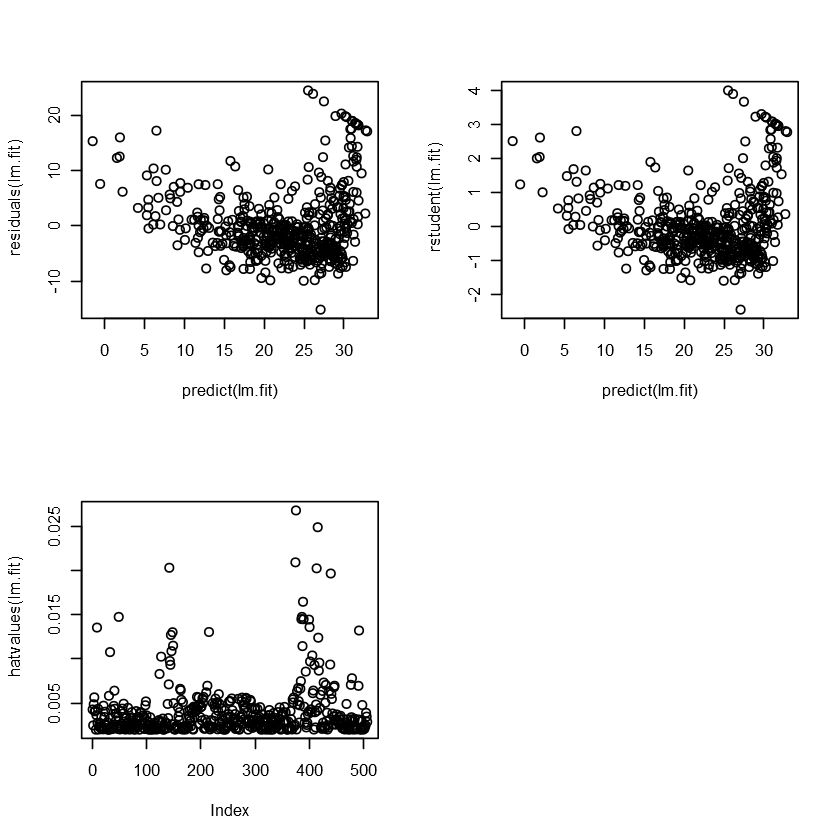

In [9]:
par(mfrow=c(2,2))
# Is there any evidence of non-linearity?

# The residuals from a linear regression fit using the residuals() function.
plot(predict(lm.fit), residuals(lm.fit))
#  The function rstudent() will return the residuals() rstudent() studentized residuals, 
# and we can use this function to plot the residuals against the fitted values.
plot(predict(lm.fit), rstudent(lm.fit))

# Leverage statistics
plot(hatvalues(lm.fit))

### Potential Problems
1. Non-linearity of the response-predictor relationships.
  - Is there any visible trend in the residual plots? 
  - If yes, use a transformation like log, sqrt, pow
2. Correlation of error terms.
  - Are the errors correlated, especially in time series?
3. Non-constant variance of error terms.
  - Is there heteroscedasticity?
  - If yes, use a concave function like log or sqrt
4. Outliers.
  - Observe the studentized residuals
  - Values over [-2,2], especially greater than [-3,3] are outliers
5. High-leverage points.
  - Compare the leverage statistic and (p+1)/n
  - Values that exceeds (p+1)/n are high leverage points
6. Collinearity
  - Compute the VIF

# Multiple Linear Regression

In [10]:
# Add a predictor
lm.fit=lm(medv~lstat+age,data=Boston)
# Remove a predictor
lm.fit=lm(medv~.-age,data=Boston)
# Add interraction
lm.fit=lm(medv~lstat*age,data=Boston)
# Non-linear Transformations of the Predictors
lm.fit2=lm(medv~lstat+I(lstat^2),data=Boston)        # I() is needed to preserve ^
lm.fit5=lm(medv~poly(lstat,5),data=Boston)

In [11]:
lm.fit=lm(medv~.,data=Boston)
# The F-statistic is high -> there is a relationship between response and predictors
summary(lm.fit)
summary(lm.fit)$r.sq
summary(lm.fit)$sigma
library(car)
t(vif(lm.fit))


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

[1] 0.7406427

[1] 4.745298

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1.792192,2.298758,3.991596,1.073995,4.39372,1.933744,3.100826,3.955945,7.484496,9.008554,1.799084,1.348521,2.941491


In [12]:
lm.fit=lm(medv~lstat, data=Boston)
lm.fit2=lm(medv~lstat+I(lstat^2),data=Boston)        # I() is needed to preserve ^
anova(lm.fit,lm.fit2)
# The F-statistic is 135 and p-value is 0. The nonlinear model has a clear advantage over the linear.

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


In [13]:
# Qualitative Predictors
lm.fit=lm(Sales~.+Income:Advertising+Price:Age,data=Carseats)
summary(lm.fit)
# How does R generates dummy variables?
contrasts(Carseats$ShelveLoc)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


In [15]:
# R has created a ShelveLocGood dummy variable that takes on a value of
# 1 if the shelving location is good, and 0 otherwise. It has also created a
# ShelveLocMedium dummy variable that equals 1 if the shelving location is
# medium, and 0 otherwise. A bad shelving location corresponds to a zero
# for each of the two dummy variables. The fact that the coefficient for
# ShelveLocGood in the regression output is positive indicates that a good
# shelving location is associated with high sales (relative to a bad location).
# And ShelveLocMedium has a smaller positive coefficient, indicating that a
# medium shelving location leads to higher sales than a bad shelving location
# but lower sales than a good shelving location (all other predictors remaining fixed).